In [1]:
import pandas as pd
from matplotlib.pylab import plt
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from nltk.stem.snowball import SnowballStemmer
import json
import requests

In [2]:
df = pd.read_csv("../processed_datasets/WELFake_Dataset_processed.csv")

In [3]:
#Removing all of the NaN values
df.head(5)

,title,text,label,all,length,stem
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,law enforcement high alert threats cops whites...,4250,law enforc high alert threat cop white $number...
1,,Did they post their votes for Hillary already?,1,post votes hillary already?,39,post vote hillari already?
2,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...,"Now, most of the demonstrators gathered last n...",1,unbelievable! obamas attorney general charlott...,295,unbelievable! obama attorney general charlott ...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"bobby jindal, raised hindu, story christian co...",6736,"bobbi jindal, rais hindu, stori christian conv..."
4,SATAN $NUMBER$: Russia unvelis an image of its...,"The RS-28 Sarmat missile, dubbed Satan $NUMBER...",1,satan $number$: russia unvelis image terrifyin...,1733,satan $number$: russia unv imag terrifi supern...


In [4]:
print(f'Ratio of news')
print(df.label.value_counts(normalize = True).rename({1:'Reliable',0:'Fake'}))

Ratio of news
Reliable    0.51404
Fake        0.48596
Name: label, dtype: float64


In [5]:
df = df.fillna(' ')
df.head()

,title,text,label,all,length,stem
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,law enforcement high alert threats cops whites...,4250,law enforc high alert threat cop white $number...
1,,Did they post their votes for Hillary already?,1,post votes hillary already?,39,post vote hillari already?
2,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...,"Now, most of the demonstrators gathered last n...",1,unbelievable! obamas attorney general charlott...,295,unbelievable! obama attorney general charlott ...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"bobby jindal, raised hindu, story christian co...",6736,"bobbi jindal, rais hindu, stori christian conv..."
4,SATAN $NUMBER$: Russia unvelis an image of its...,"The RS-28 Sarmat missile, dubbed Satan $NUMBER...",1,satan $number$: russia unvelis image terrifyin...,1733,satan $number$: russia unv imag terrifi supern...


In [79]:
df["all"] = df["title"] + df["text"]
df.head()

,title,text,label,all,length,stem
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4250,law enforc high alert threat cop white $number...
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,39,post vote hillari already?
2,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...,"Now, most of the demonstrators gathered last n...",1,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...,295,unbelievable! obama attorney general charlott ...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6736,"bobbi jindal, rais hindu, stori christian conv..."
4,SATAN $NUMBER$: Russia unvelis an image of its...,"The RS-28 Sarmat missile, dubbed Satan $NUMBER...",1,SATAN $NUMBER$: Russia unvelis an image of its...,1733,satan $number$: russia unv imag terrifi supern...


In [80]:
df["length"] = df["title"].apply(lambda n: len(n.split()))

In [81]:
fake_lengths = df[df["label"] == 1]["length"]
real_lengths = df[df['label'] == 0]["length"]
print(fake_lengths.shape)
print(real_lengths.shape)

(32072,)
(30320,)


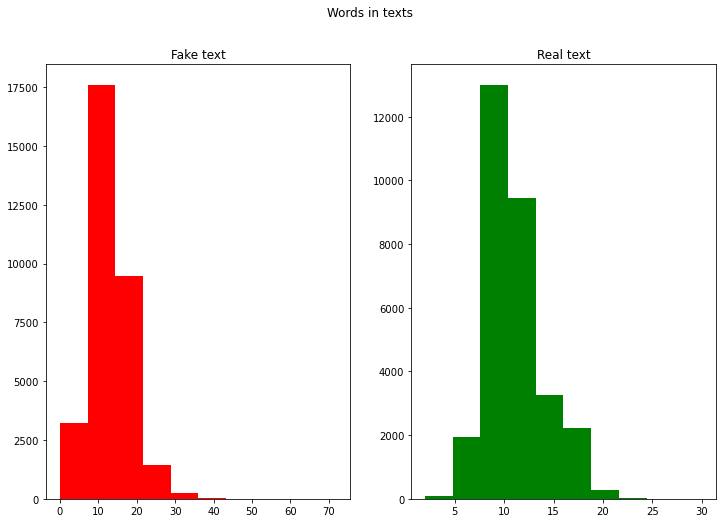

In [82]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(fake_lengths,color='red')
ax1.set_title('Fake text')
ax2.hist(real_lengths,color='green')
ax2.set_title('Real text')
fig.suptitle('Words in texts')
plt.show()

In [83]:
#Removing stopwords
f = open("../stop_words_english.json").read()
response = pd.DataFrame(data = json.loads(f))
df['all'] = df['all'].str.lower()
SW = list(response[0])
df['all'] = df['all'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (SW)]))

In [84]:
#Stemming words
stemmer = SnowballStemmer('english')
df['stem'] = df['all'].apply(
    lambda x:' '.join([stemmer.stem(y) for y in x.split()]))

In [6]:
#Removing numbers
df_text = df['stem'].copy()
df_text = df_text.str.replace('\d+', '')
df_text = df_text.str.replace('$number$', '')

/tmp/ipykernel_331/1371957293.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text = df_text.str.replace('\d+', '')
/tmp/ipykernel_331/1371957293.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text = df_text.str.replace('$number$', '')


In [7]:
df['all'] = df['all'].str.replace('number','')
df['all'] = df['all'].str.replace('$','')
df['all'] = df['all'].str.replace('[^\w\s]','')
df['stem'] = df_text.str.replace('$','')
df.head()

/tmp/ipykernel_331/3708347329.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['all'] = df['all'].str.replace('$','')
/tmp/ipykernel_331/3708347329.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['all'] = df['all'].str.replace('[^\w\s]','')
/tmp/ipykernel_331/3708347329.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['stem'] = df_text.str.replace('$','')


,title,text,label,all,length,stem
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,law enforcement high alert threats cops whites...,4250,law enforc high alert threat cop white number-...
1,,Did they post their votes for Hillary already?,1,post votes hillary already,39,post vote hillari already?
2,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...,"Now, most of the demonstrators gathered last n...",1,unbelievable obamas attorney general charlotte...,295,unbelievable! obama attorney general charlott ...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,bobby jindal raised hindu story christian conv...,6736,"bobbi jindal, rais hindu, stori christian conv..."
4,SATAN $NUMBER$: Russia unvelis an image of its...,"The RS-28 Sarmat missile, dubbed Satan $NUMBER...",1,satan russia unvelis image terrifying supernu...,1733,satan number: russia unv imag terrifi supernuk...


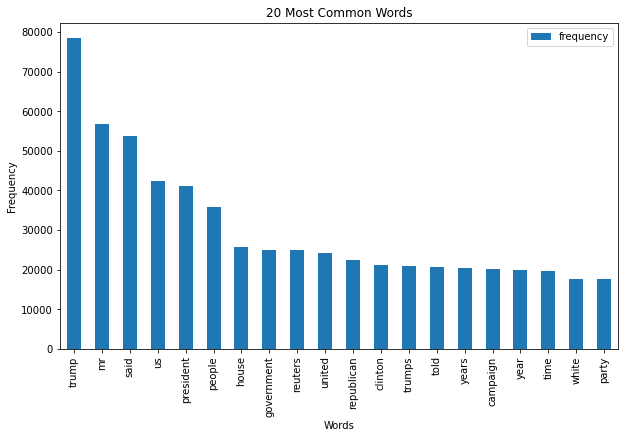

In [75]:
#Most used words in each type of news
from collections import Counter
word_freq = Counter(' '.join(df[df['label'] == 0]['all']).split())
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_word_freq.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

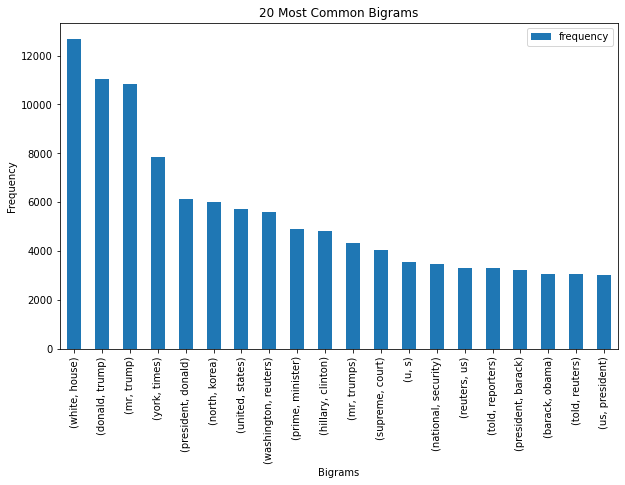

In [78]:
#top bigrams
from nltk import ngrams
bigrams = [bigram for text in df[df['label']==0]['all'] for bigram in ngrams(text.split(), 2)]
bigram_freq = Counter(bigrams)
df_bigram_freq = pd.DataFrame.from_dict(bigram_freq, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_bigram_freq.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('20 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
#Splitting training and testing data
train_labels = df['label']
x_train,x_test,y_train,y_test = train_test_split(df["stem"],train_labels,test_size = 0.3)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english', max_df = 0.9,min_df = 0.1)
tfidf_train = tfidf.fit_transform(x_train)
tfidf_test = tfidf.transform(x_test)

In [9]:
print(tfidf_train.shape)

(43674, 242)


Training the model using kf cross validation

In [10]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

def cross_validate_train(X,y,num_folds,clf):
    
    if clf == 'SVC':
        clf = SVC()
        print(clf.get_params())
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf']
        }
    elif clf == 'NB':
        clf = MultinomialNB()
        param_grid = {  
            'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
        }
    elif clf == 'PAC':
        clf = PassiveAggressiveClassifier()
        param_grid = {'C': [0.1, 1, 10]}

    elif clf == 'random_forest':
        clf = RandomForestClassifier()
        param_grid = {
            'n_estimators': [100, 200, 300]
        }
    else:
        clf = LogisticRegression(max_iter = 2000)
        param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=num_folds, n_jobs=-1, verbose=1)
    grid_search.fit(X, y)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    return best_params, best_score
    

In [13]:

def search_models(k):
    params,score = cross_validate_train(tfidf_train,y_train,k,'SVC')
    print("Best svc for k =",k,params,score)
    best_params_pac,best_score_pac = cross_validate_train(tfidf_train,y_train,k,'PAC')
    print("Best pac for k =",k,best_params_pac,best_score_pac)
    best_params_log,best_score_log = cross_validate_train(tfidf_train,y_train,k,'log')
    print("Best log for k =",k,best_params_log,best_score_log)
    best_params_nb,best_score_nb = cross_validate_train(tfidf_train,y_train,k,'NB')
    print("Best nb for k =",k,best_params_nb,best_score_nb)
    best_params_rf,best_score_rf = cross_validate_train(tfidf_train,y_train,k,'random_forest')
    print("Best rf for k =",k,best_params_rf,best_score_rf)

In [67]:
feature_names = tfidf.get_feature_names_out()
print(feature_names)

['accus' 'action' 'administr' 'agenc' 'america' 'american' 'announc'
 'anti' 'appear' 'ask' 'attack' 'attempt' 'author' 'barack' 'base' 'big'
 'bring' 'build' 'busi' 'campaign' 'candid' 'care' 'case' 'center' 'chang'
 'charg' 'chief' 'citi' 'claim' 'clear' 'clinton' 'close' 'come' 'comment'
 'compani' 'concern' 'congress' 'conserv' 'continu' 'control' 'countri'
 'country' 'court' 'creat' 'critic' 'day' 'deal' 'decid' 'decis'
 'democrat' 'depart' 'director' 'discuss' 'don' 'donald' 'dont' 'earli'
 'earlier' 'effort' 'elect' 'election' 'email' 'execut' 'expect' 'face'
 'fact' 'fail' 'famili' 'featur' 'feder' 'feel' 'fight' 'final' 'follow'
 'forc' 'foreign' 'free' 'friday' 'fund' 'general' 'good' 'govern' 'great'
 'group' 'hand' 'happen' 'hard' 'head' 'held' 'help' 'high' 'hillari'
 'hold' 'hope' 'hous' 'imag' 'includ' 'increas' 'intern' 'interview'
 'investig' 'involv' 'issu' 'job' 'john' 'kill' 'kind' 'law' 'lead'
 'leader' 'leav' 'left' 'legal' 'life' 'live' 'long' 'lot' 'major' 'make

In [11]:
import pickle

In [14]:
ix = [5,6,7]
for i in ix:
    search_models(i)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best svc for k = 5 {'C': 10, 'kernel': 'rbf'} 0.9471539302745301
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best pac for k = 5 {'C': 0.1} 0.9213490993556425
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best log for k = 5 {'C': 100} 0.922219180671396
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best nb for k = 5 {'alpha': 0.1} 0.8528186669312658
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best rf for k = 5 {'n_estimators': 300} 0.9436735814177963
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'sca

In [15]:
#Creating each classifier
svm_classifier = SVC(C = 10,kernel = 'rbf')
log_classifier = LogisticRegression(C = 100,max_iter = 2000)
rf_classifier = RandomForestClassifier(n_estimators = 300)
pac_classifier = PassiveAggressiveClassifier(C = 0.1)
nb_classifier = MultinomialNB(alpha = 0.1)

clf_list = [svm_classifier,log_classifier,rf_classifier,pac_classifier,nb_classifier]
clf_names = ["SVM","Logistic Regression","Random Forest","Passive Agressive Classifier","Naive Bayes"]
for i in range(len(clf_list)):
    clf_list[i].fit(tfidf_train,y_train)
    filename = clf_names[i] + ".sav"
    pickle.dump(clf_list[i], open(filename, 'wb'))
    print("done")

done
done
done
done
done


In [11]:
from sklearn import metrics


#Training the best models
def evaluate(model_name,model,test_set,test_labels):
    predicted = model.predict(test_set)
    print(model_name + "Accuracy:",metrics.accuracy_score(test_labels, predicted))
    print(model_name +"Precision:",metrics.precision_score(test_labels, predicted))
    print(model_name +"Recall:",metrics.recall_score(test_labels, predicted))
    print(model_name +"Matthews Coefficient:",metrics.matthews_corrcoef(test_labels, predicted))

In [64]:
svm_classifier = pickle.load(open("classifiers/SVM.sav", 'rb'))
log_classifier = pickle.load(open("classifiers/Logistic Regression.sav", 'rb'))
rf_classifier = pickle.load(open("classifiers/Random Forest.sav", 'rb'))
pac_classifier = pickle.load(open("classifiers/Passive Agressive Classifier.sav", 'rb'))
nb_classifier = pickle.load(open("classifiers/Naive Bayes.sav", 'rb'))

In [23]:
clf_list = [svm_classifier,log_classifier,rf_classifier,pac_classifier,nb_classifier]
clf_names = ["SVM","Logistic Regression","Random Forest","Passive Agressive Classifier","Naive Bayes"]
for i in range(len(clf_list)):
    evaluate(clf_names[i],clf_list[i],tfidf_test,y_test)

SVMAccuracy: 0.9527193076183353
SVMPrecision: 0.9450232078390923
SVMRecall: 0.9630018919487072
SVMMatthews Coefficient: 0.9055519232888102
Logistic RegressionAccuracy: 0.9218933646757133
Logistic RegressionPrecision: 0.913007796471071
Logistic RegressionRecall: 0.9354635274332562
Logistic RegressionMatthews Coefficient: 0.8439433161775731
Random ForestAccuracy: 0.9469494604124372
Random ForestPrecision: 0.9249875311720698
Random ForestRecall: 0.9746689089762456
Random ForestMatthews Coefficient: 0.8951121080809927
Passive Agressive ClassifierAccuracy: 0.920397478363073
Passive Agressive ClassifierPrecision: 0.902407221664995
Passive Agressive ClassifierRecall: 0.9456590287996637
Passive Agressive ClassifierMatthews Coefficient: 0.841624379984082
Naive BayesAccuracy: 0.8550593012073939
Naive BayesPrecision: 0.8511824847671177
Naive BayesRecall: 0.866302291360101
Naive BayesMatthews Coefficient: 0.7100682136092105


Implementing the voting classifier

In [12]:
from sklearn.ensemble import VotingClassifier

svm_classifier = SVC(C = 10,kernel = 'rbf')
log_classifier = LogisticRegression(C = 100,max_iter = 2000)
rf_classifier = RandomForestClassifier(n_estimators = 300)
pac_classifier = PassiveAggressiveClassifier(C = 0.1)
nb_classifier = MultinomialNB(alpha = 0.1)
ens_list = [('SVM',svm_classifier),('LR',log_classifier),('RF',rf_classifier),('PAC',pac_classifier),('NB',nb_classifier)]
vot_hard = VotingClassifier(estimators = ens_list, voting ='hard')
vot_hard.fit(tfidf_train, y_train)


VotingClassifier(estimators=[('SVM', SVC(C=10)),
                             ('LR', LogisticRegression(C=100, max_iter=2000)),
                             ('RF', RandomForestClassifier(n_estimators=300)),
                             ('PAC', PassiveAggressiveClassifier(C=0.1)),
                             ('NB', MultinomialNB(alpha=0.1))])

In [36]:
evaluate("Hard voting classifier",vot_hard,tfidf_test,y_test)

Hard voting classifierAccuracy: 0.9350892189336467
Hard voting classifierPrecision: 0.9204579997973452
Hard voting classifierRecall: 0.9548034475509775
Hard voting classifierMatthews Coefficient: 0.8706888974334901


In [15]:
svm_classifier = SVC(C = 10,kernel = 'rbf')
rf_classifier = RandomForestClassifier(n_estimators = 300)
ens_list = [('SVM',svm_classifier),('RF',rf_classifier)]
vot_hard = VotingClassifier(estimators = ens_list, voting ='hard')
vot_hard.fit(tfidf_train, y_train)

VotingClassifier(estimators=[('SVM', SVC(C=10)),
                             ('RF', RandomForestClassifier(n_estimators=300))])

In [19]:
filename = "classifiers/voting.sav"
pickle.dump(vot_hard, open(filename, 'wb'))

In [38]:
evaluate("Hard voting classifier",vot_hard,tfidf_test,y_test)

Hard voting classifierAccuracy: 0.9533069772411582
Hard voting classifierPrecision: 0.9571428571428572
Hard voting classifierRecall: 0.9507042253521126
Hard voting classifierMatthews Coefficient: 0.9066201190001392


In [39]:
log_classifier = pickle.load(open("classifiers/Logistic Regression.sav", 'rb'))
rf_classifier = pickle.load(open("classifiers/Random Forest.sav", 'rb'))
pac_classifier = pickle.load(open("classifiers/Passive Agressive Classifier.sav", 'rb'))
nb_classifier = pickle.load(open("classifiers/Naive Bayes.sav", 'rb'))

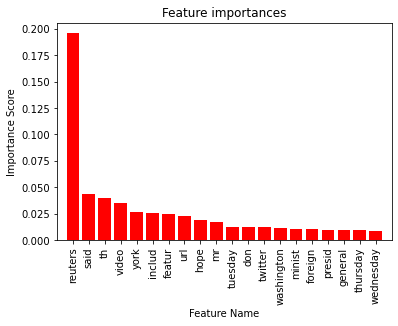

In [127]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = tfidf.get_feature_names_out()
k = 20 
plt.figure()
plt.title("Feature importances")
plt.bar(range(k), importances[indices][:k], color="r", align="center")
plt.xticks(range(k), [feature_names[i] for i in indices[:k]], rotation=90)
plt.xlim([-1, k])
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.show()
top_k_features = tfidf_train[:, indices[:k]]